### Importing Libraries

In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Setting plotting style
sns.set(style="whitegrid")
%matplotlib inline

# Creating directory for saving plots
os.makedirs("plots", exist_ok=True)


# 1. Setup & Data Loading
In this section, we import the required libraries and load the dataset using pandas. We'll also explore the dataset structure and check for any missing values.

Loading the Data

In [2]:
# Load the dataset and also handling errors that might occur incase the file doesnt exist
file_path = "data/SuperMarket Analysis.csv"  

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path.")


Dataset loaded successfully.


#### Initial Exploration

In [3]:
# Display the first 5 rows
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


#### Data Info
We explore the dataset using .info() and .isnull() to check for data types, null values, and overall cleanliness.

In [4]:
# Explore data structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
# Check for missing values
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:
# Checking for duplicate entries
df.duplicated().sum()

0

#### Data Cleaning
We convert Date and Time into datetime types for better analysis.

In [7]:
# Converting 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extracting additional time features
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.day_name()


# 2. Basic Data Analysis
We now perform basic statistical analysis: mean, median, std dev, and aggregations by categorical columns like Branch, Gender, and Product Line.

#### Basic stats

In [8]:
# Describing numeric columns
df.describe()


,Unit price,Quantity,Tax 5%,Sales,Date,cogs,gross margin percentage,gross income,Rating,Day,Month
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905,15.379369,6.97270,15.256000,1.993000
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905,0.508500,4.00000,1.000000,1.000000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905,5.924875,5.50000,8.000000,1.000000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905,12.088000,7.00000,15.000000,2.000000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905,22.445250,8.50000,23.000000,3.000000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905,49.650000,10.00000,31.000000,3.000000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,0.000000,11.708825,1.71858,8.693563,0.835254


#### Grouping by Category

In [14]:
# Average sales per product line
product_sales = df.groupby("Product line")["Sales"].mean().sort_values(ascending=False)
# Print average sales per product line
print("Average Sales by Product Line:")
print(product_sales, end="\n\n")


Average Sales by Product Line:
Product line
Home and lifestyle        336.636956
Sports and travel         332.065220
Health and beauty         323.643020
Food and beverages        322.671517
Electronic accessories    319.632538
Fashion accessories       305.089298
Name: Sales, dtype: float64



In [15]:
# Sales by gender
gender_sales = df.groupby("Gender")["Sales"].mean()

# Print average sales by gender
print(" Average Sales by Gender:")
print(gender_sales, end="\n\n")


 Average Sales by Gender:
Gender
Female    340.931414
Male      299.055738
Name: Sales, dtype: float64



In [16]:
# Average rating by branch
branch_ratings = df.groupby("Branch")["Rating"].mean()
# Print average rating by branch
print("Average Customer Rating by Branch:")
print(branch_ratings)

Average Customer Rating by Branch:
Branch
Alex     7.027059
Cairo    6.818072
Giza     7.072866
Name: Rating, dtype: float64


##  Insights from Aggregated Sales and Ratings Data

###  Average Sales by Product Line

From the data, we can observe that:

- **Home and Lifestyle** leads all product lines with the highest average sales per transaction, at approximately **336.64**.
- **Sports and Travel** follows closely behind with **332.07**, indicating a strong consumer interest in these categories.
- On the lower end, **Fashion Accessories** have the lowest average transaction value at **305.09**, which may suggest either lower pricing, smaller basket sizes, or lower demand compared to other categories.

This breakdown could help inform inventory decisions or targeted promotions for lower-performing categories.

---

### Average Sales by Gender

Interestingly:

- **Female customers** on average spend significantly more (**340.93**) compared to **male customers** (**299.06**).
- This could indicate differing shopping behaviors or preferences that could be leveraged for more personalized marketing strategies.

---

### Average Customer Rating by Branch

Analyzing customer satisfaction:

- The **Giza branch** has the highest average customer rating (**7.07**), slightly outperforming **Alex (7.03)** and **Cairo (6.82)**.
- While the differences are subtle, it may be worth exploring what operational or customer service factors contribute to Giza's higher ratings, and whether Cairo could benefit from targeted improvements.

---

These insights offer a clear snapshot of both consumer behavior and store performance across dimensions such as gender, product category, and location. Strategic actions such as tailored marketing, inventory adjustments, or training programs can be considered based on this analysis.


#### Save Insights Table

In [19]:
# Showing side-by-side insights
display(pd.DataFrame({
    'Avg Total by Product': product_sales,
    'Avg Total by Gender': gender_sales,
    'Avg Rating by Branch': branch_ratings
}))


,Avg Total by Product,Avg Total by Gender,Avg Rating by Branch
Alex,NaN,NaN,7.027059
Cairo,NaN,NaN,6.818072
Electronic accessories,319.632538,NaN,NaN
Fashion accessories,305.089298,NaN,NaN
Female,NaN,340.931414,NaN
Food and beverages,322.671517,NaN,NaN
Giza,NaN,NaN,7.072866
Health and beauty,323.643020,NaN,NaN
Home and lifestyle,336.636956,NaN,NaN
Male,NaN,299.055738,NaN


# 3. Data Visualizations
I now create a variety of insightful visualizations and save them as image files.

Line Plot: Sales Over Time

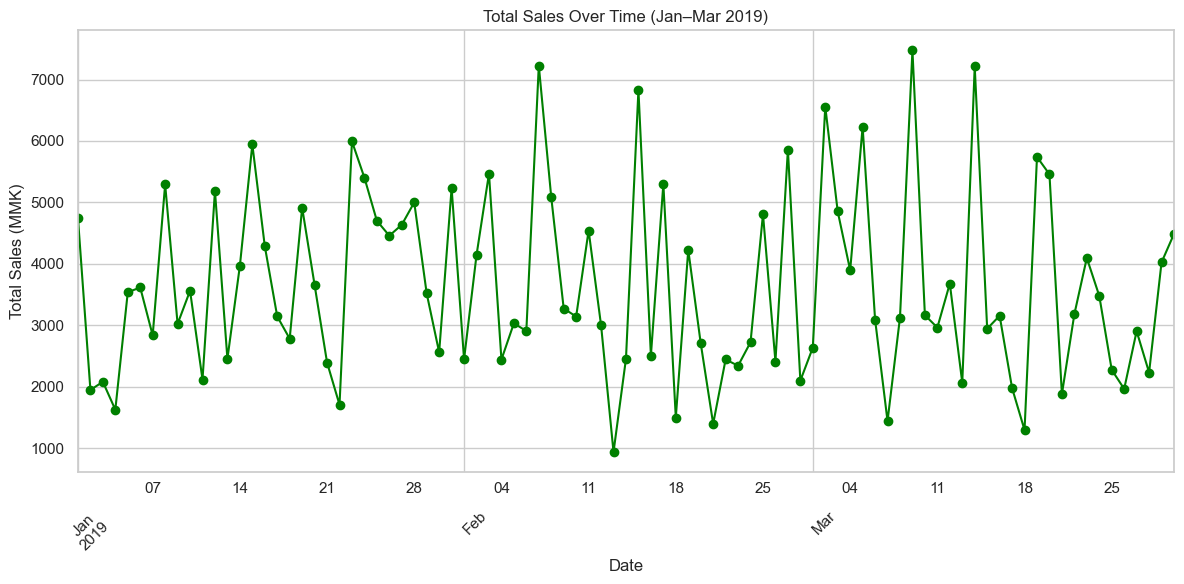

In [22]:
plt.figure(figsize=(12, 6))
df.groupby("Date")["Sales"].sum().plot(kind='line', marker='o', color='green')
plt.title("Total Sales Over Time (Jan–Mar 2019)")
plt.ylabel("Total Sales (MMK)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("plots/sales_over_time.png")
plt.show()


#### Bar Plot: Avg Sales by Product Line

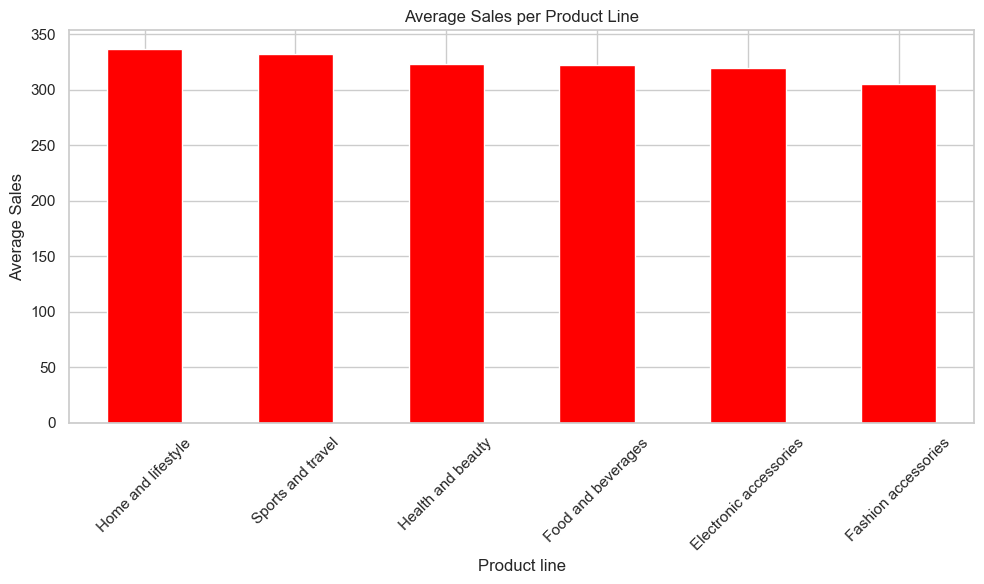

In [36]:
plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar', color='red')
plt.title("Average Sales per Product Line")
plt.ylabel("Average Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("plots/avg_sales_by_product.png")
plt.show()


#### Histogram: Customer Ratings

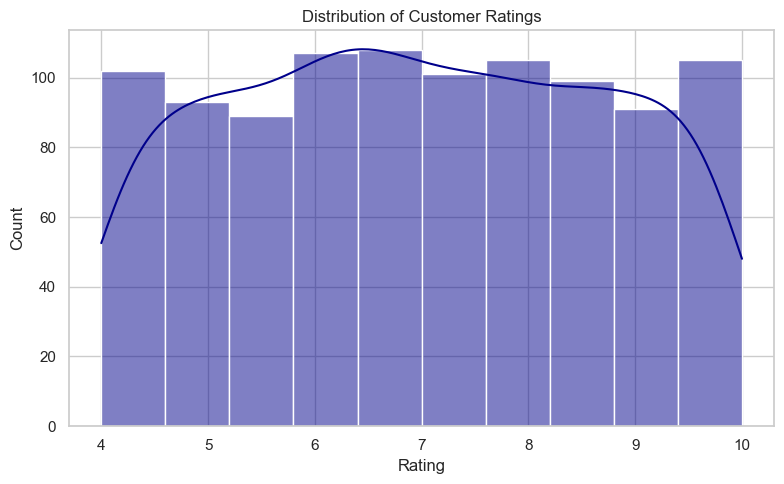

In [35]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Rating"], bins=10, kde=True, color="darkblue")
plt.title("Distribution of Customer Ratings")
plt.xlabel("Rating")
plt.tight_layout()
plt.savefig("plots/customer_ratings_hist.png")
plt.show()


####  Scatter Plot: Quantity vs. Total

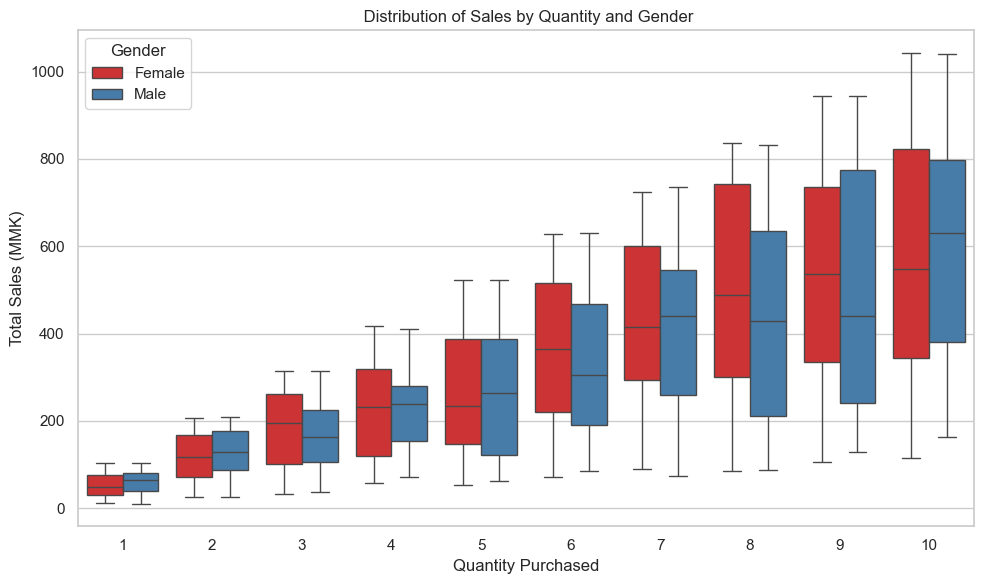

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Quantity", y="Sales", hue="Gender", palette="Set1")
plt.title(" Distribution of Sales by Quantity and Gender")
plt.xlabel("Quantity Purchased")
plt.ylabel("Total Sales (MMK)")
plt.tight_layout()
plt.savefig("plots/quantity_vs_sales.png")
plt.show()


#### Pie Chart: Payment Methods

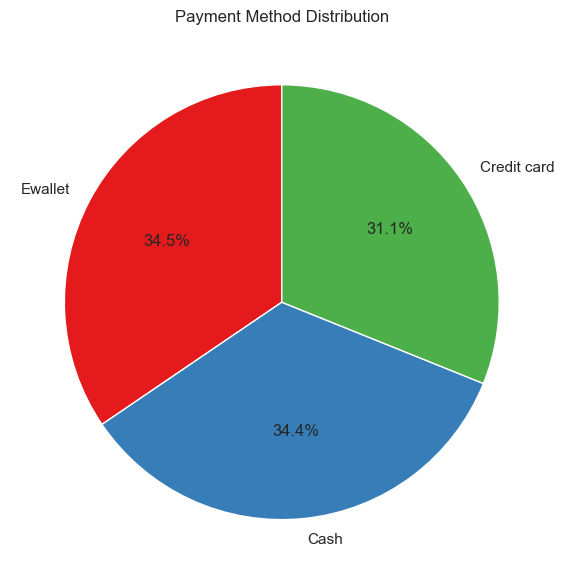

In [32]:
plt.figure(figsize=(6, 6))
bright_colors = sns.color_palette('Set1')  

df['Payment'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    shadow=False,
    colors=bright_colors,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

plt.title("Payment Method Distribution")
plt.ylabel('') 
plt.tight_layout()
plt.savefig("plots/payment_pie.png")
plt.show()


In [ ]:
#### Boxplot: Sales per Branch

C:\Users\Admin\AppData\Local\Temp\ipykernel_7080\4282280171.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Branch", y="Sales", palette="Set1")


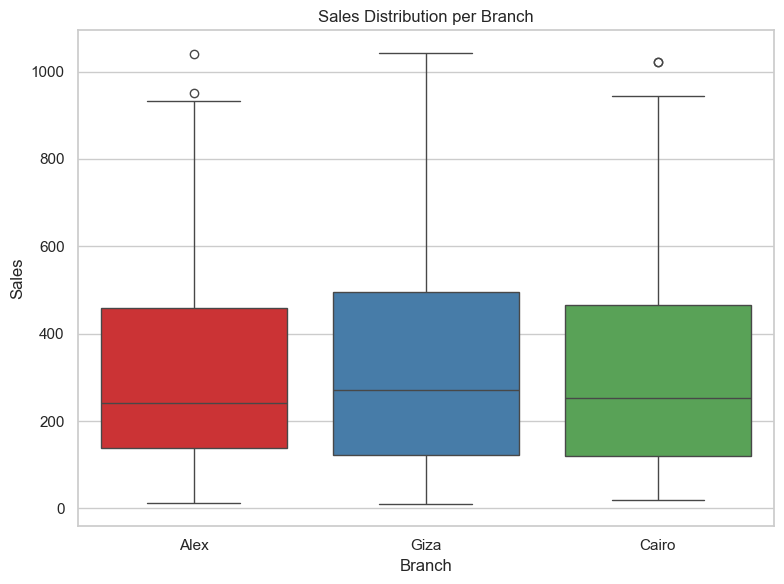

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Branch", y="Sales", palette="Set1")
plt.title("Sales Distribution per Branch")
plt.tight_layout()
plt.savefig("plots/boxplot_sales_branch.png")
plt.show()


#### Sales by Day of Week

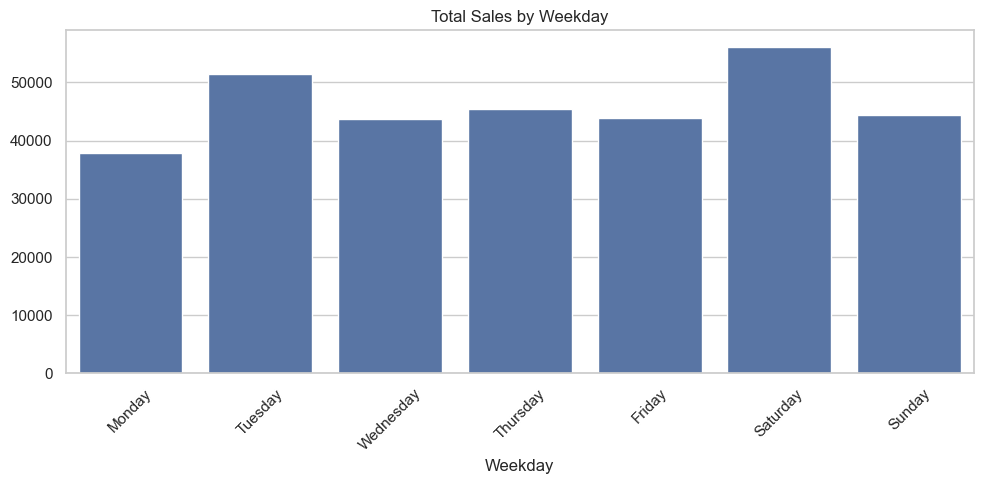

In [29]:
plt.figure(figsize=(10,5))
weekday_sales = df.groupby("Weekday")["Sales"].sum().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
sns.barplot(x=weekday_sales.index, y=weekday_sales.values)
plt.title("Total Sales by Weekday")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("plots/sales_by_weekday.png")
plt.show()
